In [2]:
%load_ext autoreload

In [3]:
%autoreload 2
%reset -f -s
import logging
import random
import numpy as np
import pandas as pd
from pathlib import Path

from PIL import ImageDraw, ImageFont, Image
from datasets import ClassLabel, load_dataset, Features, Image as DsImage, Value
from skrub import TableReport

from digression_code import (show_examples, show_predictions, Task, PTModel, FTModel, ImageFolderDataset, load_annotations_csv)
logging.basicConfig(level=logging.INFO)
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)
logging.getLogger("PIL").setLevel(logging.CRITICAL)




In [4]:

task = Task("crop_name")
df = load_annotations_csv(f"wrong_crop_model/62340e30573f02a7303dd8b6.alth/annotations.csv")
TableReport(df)

/mnt/04d0b00d-a522-42d5-a6ff-09561d9cdcca/dcai-lab/data_centric_model_centric/digression_code/aletheia_data.py:83: DtypeWarning: Columns (8,9,16,17,18,20,21,22,23,24,25,27,29,30,31,33,34,35,37,38,40,42,43,44,46,47,48,50,51,53,71,72,74,80,84,85,103,108,109,111,113,118,121,122,127) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(alth_dset_path).set_index("id")[cols].drop_duplicates()


Processing column  13 / 13


<TableReport: use .open() to display>

In [4]:
# if not Path(f"ifd-data/{task.name}-train.parquet").exists():
#     ds = load_dataset(
#         "imagefolder", data_dir=f"ifd-data/{task.name}",
#         features=Features({'image': DsImage(),
#                             'labels': task.labels,
#                             'id': Value(dtype='string')}),
#     )
#     ds['train'].to_parquet(f"ifd-data/{task.name}-train.parquet")
#     ds['test'].to_parquet(f"ifd-data/{task.name}-test.parquet")
# ds = load_dataset("parquet", data_files={
#     "train": f"ifd-data/{task.name}-train.parquet",
#     "test": f"ifd-data/{task.name}-test.parquet"})
ds = load_dataset(
    "imagefolder", data_dir=f"ifd-data/{task.name}",
    features=Features({'image': DsImage(),
                        'labels': task.labels,
                        'id': Value(dtype='string')}),
)
ds


Resolving data files:   0%|          | 0/60001 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/20001 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'labels', 'id'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'labels', 'id'],
        num_rows: 20000
    })
})

In [ ]:
# show_examples(ds['train'], seed=random.randint(0, 1337), examples_per_class=5, size=(200, 200))

# pt_model = PTModel(
#     model_name_or_path='google/vit-base-patch16-224-in21k',
#     task=task
# )

# prepared_ds = ds.with_transform(pt_model.pt_transform)
# show_examples(prepared_ds['train'], pre_sample=200,
#               seed=random.randint(0, 1337), examples_per_class=3,
#               size=(200, 200))


In [6]:
# prepared_ds = ds.with_transform(pt_model.transform)
# trainer = pt_model.get_trainer(prepared_ds)
# prepared_ds['train'][0]['pixel_values'].shape

# train_results = trainer.train()
# trainer.save_model()
# trainer.log_metrics("train", train_results.metrics)
# trainer.save_metrics("test", train_results.metrics)
# trainer.save_state()

# metrics = trainer.evaluate(prepared_ds['test'])
# trainer.log_metrics("eval", metrics)
# trainer.save_metrics("eval", metrics)

In [1]:
ft_model = FTModel(checkpoint_path="./vit/{task.name}", task=task)
show_predictions(
    ds['test'], ft_model,
    seed=1337,
    examples_per_class=2,
    size=(200, 200)
)

# to run tensorboard:
# tensorboard --logdir_spec=angle_to_row:vit-angle_to_row,crop_height:vit-crop_height,crop_residue:vit-crop-residue,row_spacing:vit-row_spacing,tillage_practice:vit-tillage_practice
# tensorboard --logdir_spec=crop_name:vit/crop_name

NameError: name 'FTModel' is not defined

In [23]:
ft_model.predictions_df(ds['test'], task, sample=100)

0it [00:00, ?it/s]

image_id  y_hat  y_tilde      CORN    COTTON  RAPESEED  \
0   5ed7dc5fa55b0375e1545815      3        3  0.000980  0.002550  0.001976   
1   605cc9ff9e475a0b94bd2181      6        6  0.002109  0.002667  0.002727   
2   5f05f3c0e619ceb8d7b7ee72      5        5  0.006342  0.003980  0.010437   
3   60da7b61eab134139f6e3902      0        0  0.992347  0.001058  0.001265   
4   5fae507c4db242dde0509f3d      1        1  0.001452  0.991914  0.001069   
..                       ...    ...      ...       ...       ...       ...   
95  60f5c8632acdb6c312d3169f      1        1  0.001301  0.991848  0.001047   
96  60c0375a5b159c1755062561      3        3  0.001331  0.001534  0.001437   
97  5f3193569fa772cd9b5358e8      1        1  0.001807  0.991916  0.001309   
98  6088d4b51e31772cef0d6aa7      1        1  0.001511  0.990712  0.000905   
99  5f9d107d0dfcb4971c25c698      2        2  0.005412  0.006143  0.952439   

    SOYBEANS  SUGARBEETS     OTHER     WHEAT  
0   0.990895    0.001204  0.001221  0.001173  
1   0.002330    0.002367  0.002533  0.985266  
2   0.005712    0.008614  0.957669  0.007245  
3   0.001323    0.001461  0.001374  0.001172  
4   0.002563    0.000902  0.001016  0.001084  
..       ...         ...       ...       ...  
95  0.002840    0.000918  0.001046  0.001001  
96  0.992237    0.001069  0.001192  0.001201  
97  0.001451    0.001029  0.001306  0.001182  
98  0.003793    0.001302  0.000858  0.000920  
99  0.010808    0.007237  0.011607  0.006355  

[100 rows x 10 columns]

In [5]:
from transformers import pipeline
from PIL import Image
from tqdm.auto import tqdm


# base_dir = Path(f"ifd-data/{task.name}/train/")
# df = pd.read_csv(base_dir / "metadata.csv")
# pipe = pipeline(task="image-classification", model=ft_model.model, image_processor=ft_model.processor, batch_size=100)
# for fname in tqdm(df['file_name']):
#     inputs = base_dir / fname
#     out = pipe(inputs, top_k=len(task.labels.names))


In [85]:
from cleanlab.datalab.datalab import Datalab
import pandas as pd

from dataclasses import dataclass

@dataclass
class CLIssues:
    task: Task
    split: str
    issues_df: pd.DataFrame

    def get_issue_df(self, issue_name: str):
        cols = ["image_id", "y_hat", "y_tilde"] + self.task.labels.names + [f"is_{issue_name}_issue", f"{issue_name}_score", "abs_path"]
        df_slice = (self.issues_df[cols].loc[lambda x: x[f"is_{issue_name}_issue"]])
        return df_slice


task = Task("cloud_cover")
split = "train"
ds = load_dataset(
    "imagefolder", data_dir=f"ifd-data/{task.name}", split=split,
    features=Features({'image': DsImage(),
                        'labels': task.labels,
                        'id': Value(dtype='string')}),
)

predictions_df = (pd.read_csv(f"predictions/{task.name}/{split}.csv")
                  .assign(abs_path=lambda x: [f"ifd-data/{task.name}/{split}/{task.labels.int2str(row.y_tilde)}/{row.image_id}.png" for _, row in x.iterrows()]))
lab = Datalab(data=ds, label_name='labels')
lab.find_issues(pred_probs=predictions_df[task.labels.names].values)
#lab.report(show_summary_score = True, show_all_issues = True)

clissues = CLIssues(task=task, split=split, issues_df = pd.merge(predictions_df, lab.issues, left_index=True, right_index=True))

Resolving data files:   0%|          | 0/30001 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/7001 [00:00<?, ?it/s]

Finding label issues ...
Finding outlier issues ...
Fitting OOD estimator based on provided pred_probs ...
Finding non_iid issues ...
Finding class_imbalance issues ...

Audit complete. 566 issues found in the dataset.


In [86]:
#lab.get_issues("label")


image_id                                   5ecffecc86930d57c5f1f3f3
y_hat                                                             0
y_tilde                                                           1
OVERCAST                                                   0.989392
CLEAR                                                      0.010608
is_label_issue                                                 True
label_score                                                0.010608
abs_path          ifd-data/cloud_cover/train/CLEAR/5ecffecc86930...
Name: 953, dtype: object
0 (0, 0)
image_id                                   5ee3c91c8d783c8b7ddb232a
y_hat                                                             0
y_tilde                                                           1
OVERCAST                                                   0.978237
CLEAR                                                      0.021763
is_label_issue                                                 True
label_score   

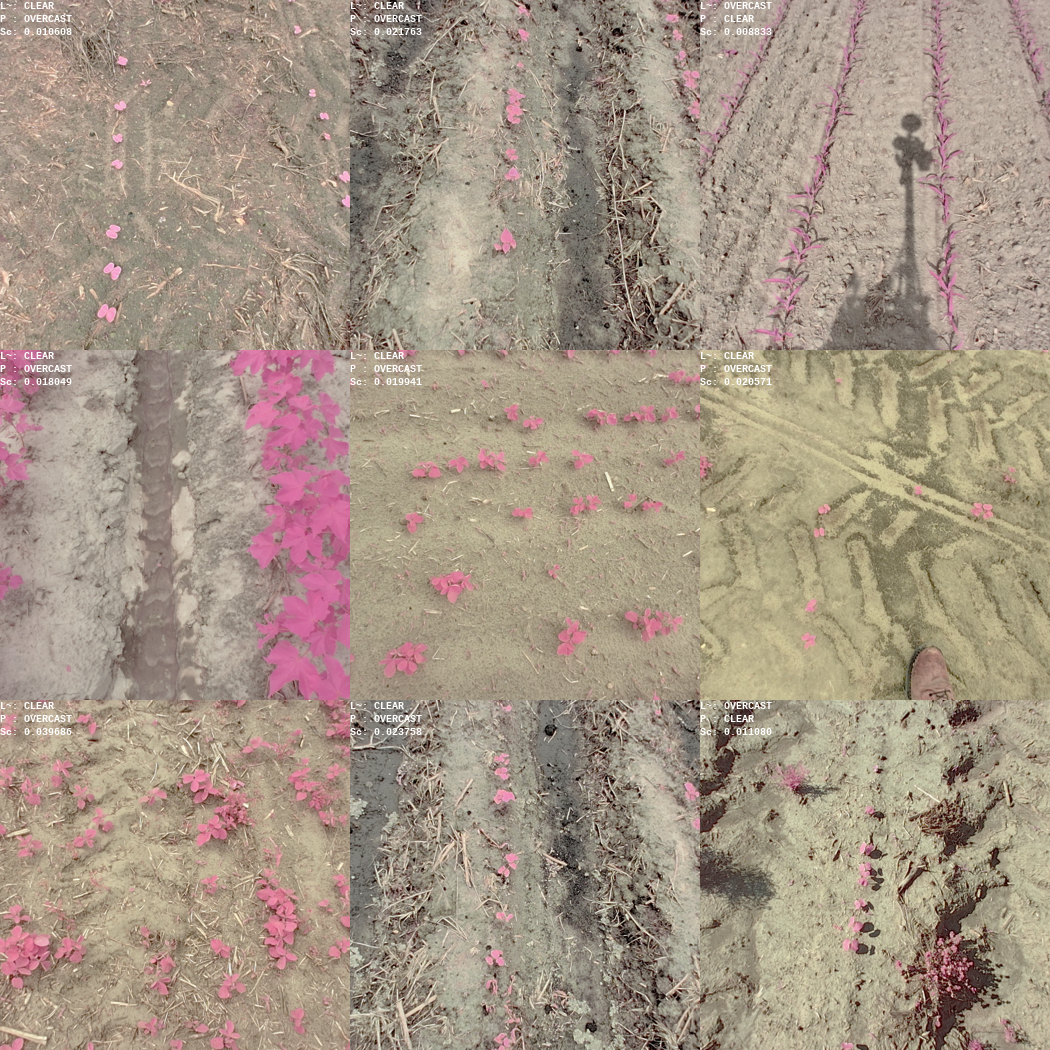

In [90]:


def show_issues(task: Task, pred_df: pd.DataFrame, issue_name: str, sample_n=9, col_wrap=2, size=(350, 350)):

    w, h = size
    grid = Image.new('RGB', size=(col_wrap * w, (sample_n // col_wrap + sample_n % col_wrap) * h))
    draw = ImageDraw.Draw(grid)
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf", 10)


    for i, (_, row) in enumerate(pred_df.sample(n=sample_n).iterrows()):
        print(row)
        #example = ds_slice.filter(lambda x: x['id'] == row.image_id)[0]
        image = Image.open(Path(row.abs_path))

        ex_label = f"L~: {task.labels.int2str(row["y_tilde"])}"
        ex_pred = f"P : {task.labels.int2str(row["y_hat"])}"
        ex_issue = row[f"{issue_name}_score"]
        box = (i % col_wrap * w, i // col_wrap * h)
        print(i, box)
        grid.paste(image.resize(size), box=box)
        draw.multiline_text(box, f"{ex_label}\n{ex_pred}\nSc: {ex_issue:2f}", (255, 255, 255), font=font)

    return grid


issue_name = "label"
show_issues(clissues.task, clissues.get_issue_df(issue_name), issue_name, 9, 3)


In [67]:
ds_image_ids

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## Below is one way to show the initial aletheia dataset

In [ ]:
import pandas as pd
from skrub import TableReport
keep_cols = [
    'angle_to_row',  # DONE
    'cloud_cover',   # DONE
    'crop_damage',
    'crop_health',
    'crop_height',   # DONE
    'crop_name',     # DONE
    'crop_residue',  # DONE
    'crop_residue_type',
    'row_spacing',   # DONE
    # 'soil_color',  # Bad results/data
    'soil_moisture',
    'tillage_practice', # DONE
    # 'weed_pressure',
    'weeds',
]

#_df = pd.read_csv("wrong_crop_model/62340e30573f02a7303dd8b6.alth/annotations.csv")[keep_cols]#.drop(columns=["id", "file_name"])
_df = pd.read_csv("wrong_crop_model/62340e30573f02a7303dd8b6.angle_to_row/train/metadata.csv")
TableReport(_df)


Processing column  14 / 14


<TableReport: use .open() to display>

In [ ]:
_df.loc[lambda x: x.id == '5eeb8f856e4ced6de9c32b0c']

id                            file_name  labels  \
83  5eeb8f856e4ced6de9c32b0c  ANGLED/5eeb8f856e4ced6de9c32b0c.png  ANGLED   
84  5eeb8f856e4ced6de9c32b0c  ANGLED/5eeb8f856e4ced6de9c32b0c.png  ANGLED   
85  5eeb8f856e4ced6de9c32b0c  ANGLED/5eeb8f856e4ced6de9c32b0c.png  ANGLED   
86  5eeb8f856e4ced6de9c32b0c  ANGLED/5eeb8f856e4ced6de9c32b0c.png  ANGLED   

   cloud_cover crop_damage crop_health crop_height crop_name crop_residue  \
83    OVERCAST    ['NONE']     HEALTHY      MEDIUM  SOYBEANS       MEDIUM   
84    OVERCAST    ['NONE']     HEALTHY      MEDIUM  SOYBEANS       MEDIUM   
85    OVERCAST    ['NONE']     HEALTHY      MEDIUM  SOYBEANS       MEDIUM   
86    OVERCAST    ['NONE']     HEALTHY      MEDIUM  SOYBEANS       MEDIUM   

   crop_residue_type row_spacing soil_moisture tillage_practice  \
83               NaN   INCHES_30           NaN     CONVENTIONAL   
84               NaN   INCHES_30           NaN     CONVENTIONAL   
85               NaN   INCHES_30           NaN     CONVENTIONAL   
86               NaN   INCHES_30           NaN     CONVENTIONAL   

                                                weeds  
83  ['OTHER_BROADLEAF', 'VELVETLEAF', 'VOLUNTEER_C...  
84  ['OTHER_BROADLEAF', 'VELVETLEAF', 'VOLUNTEER_C...  
85  ['OTHER_BROADLEAF', 'VELVETLEAF', 'VOLUNTEER_C...  
86  ['OTHER_BROADLEAF', 'VELVETLEAF', 'VOLUNTEER_C...